# Score-Based Generative Diffusion

## Critically-Damped Langevin SGM 

https://research.nvidia.com/labs/toronto-ai/CLD-SGM/

To run the toy model, `#TODO`

## Example Training Loop for a Toy Model

The toy model distribution: multiple swiss rolls

<div>
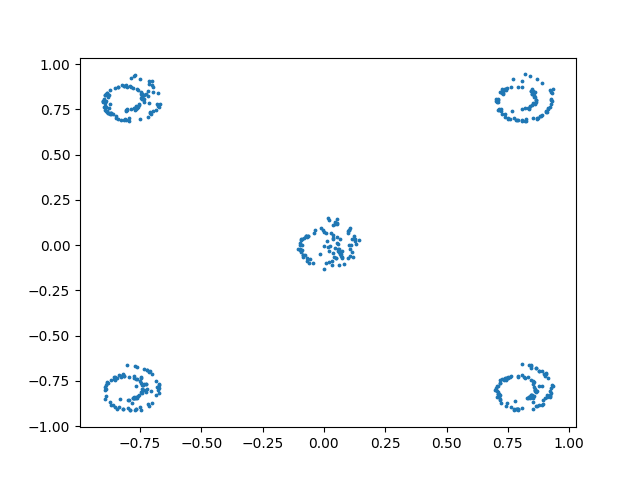
</div>

### Pseudocode

```python
def train():
    # The score model can be any NN! Deep net! U-net! Skynet!
    score_model = select_score_model() 

    # Define the optimizer for the score model
    # typically AdamW
    optimizer = select_optimizer(score_model.parameters()) 

    while step_idx < num_total_iters:
        x = generate_target_data()

        # Uniformly sample time in [0, T]
        t = sample_t() 

        # Use SDE(s) to add noise to target sample at time t
        x_noised = sde(x, t)

        # Calculate the score using the current version of the score model
        score = score_model(x_noised, t)

        # Calculate loss tensor
        loss = loss_fn(score)

        # Based on the loss tensor, optimize parameters of the score model
        # Goal: minimize loss in future steps
        optimizer.zero_grad() # Reset gradients to 0
        loss.backward() # Compute the gradient of the loss tensor
        optimizer.step() # Single optimization step (parameter update) 
    
```

## Score Model

Choice of the type of NN for the score model is dictated by the complexity of the probability density of your target data

$$
\underset{\theta}{\arg\min} \quad \mathbb{E}_{p_\text{data}(x)}\left[ || s_\theta(x) - \nabla_x \log p_\text{data}(x)||^2_2 \right]
$$

The $\theta$ values in $s_\theta(x)$ are being tweaked at every iteration of the training loop (with `optimizer.step()`).

Details of the score model are encoded in the $\theta$ values that are learned. 

In the toy model above, the code from 

### U-nets

U-nets are popular architectures for score models for image generation because that architecture is well-suited for learning parameters of image data probability densities.

U-nets were first proposed for use in image segmentation (there was no diffusion involved). 

U-nets give an output of the same dimension as the input (convenient for image generation). 